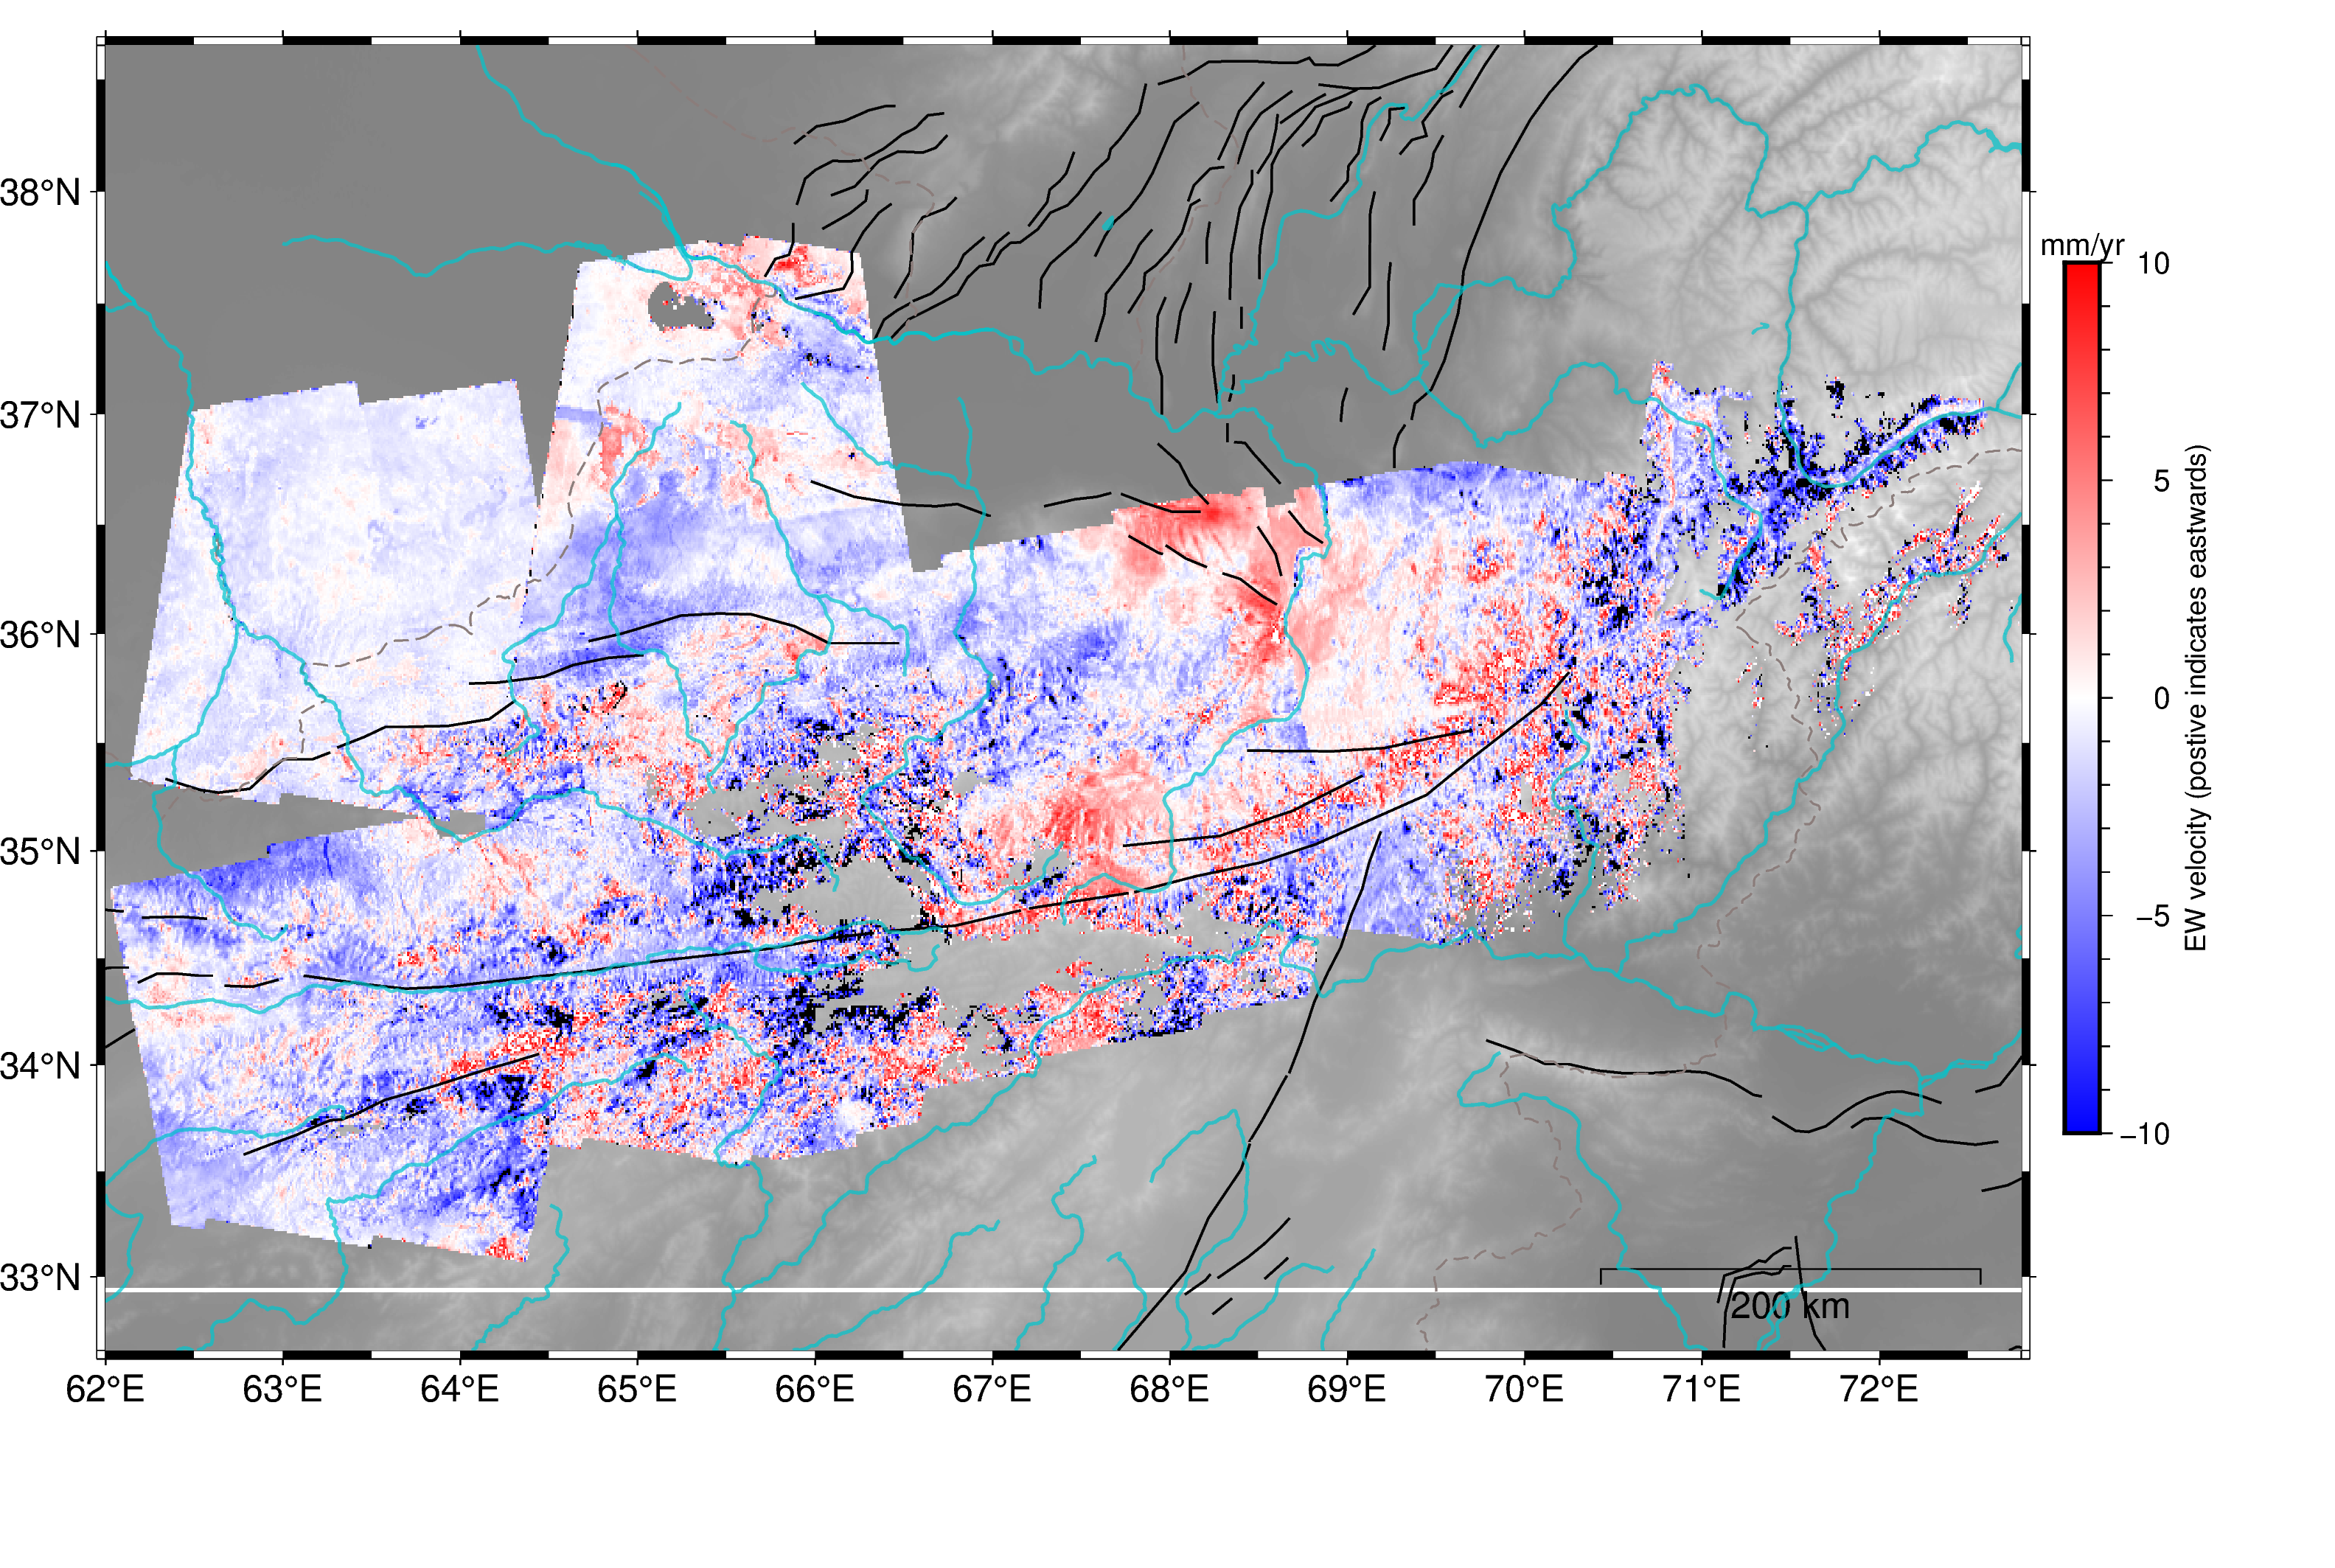

In [2]:
### GMT map plotting ###
import pygmt


###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=62 # lower left corner longitude 
llcrnrlat=32.65 # lower left corner latitude
urcrnrlon=72.8 # upper right corner longitude
urcrnrlat=38.65 # upper right corner latitude


proj_scale_w = 22 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i


###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]

fig = pygmt.Figure()

pygmt.config(MAP_FRAME_TYPE="fancy", FONT="Helvetica",\
             FONT_ANNOT_PRIMARY ="12p", FONT_LABEL = "11p") # figure config

pygmt.config(MAP_FRAME_WIDTH="0.1c") 
# DONT do PS_MEDIA="A4" this somehow breaks the cyl equidistant resizing
# pygmt default unit doesn't change mapproject default (which runs on gmt)


## here we plot an empty background canvas which MUST BE larger than the main map (for xshift yshift to work)
fig.coast(region=[0, 26.7, 0, 18], projection="Q26.7c", frame=False, land="white")
# this should be A4
# Equidistant Cylindrical Projection (Plate Carrée)


## we then shift the main map relative to the background canvas, thus indirectly controlling the border width
fig.shift_origin(xshift="1.1c", yshift="2.5c") # does NOT include map border width


## plotting the main map
fig.coast(region=region,\
        projection="M%s/%s/%s%s" % (centerlon, centerlat, proj_scale_w, proj_scale_unit),\
        water="white", land="grey", shorelines="1/0.5p",\
        frame=["WSne", "a1f0.5"])


grid = pygmt.datasets.load_earth_relief("30s", registration="gridline", region=region)
fig.grdimage(grid=grid, cmap="bin/seabluelandgrey.cpt") # topography


## plotting EW velocity
pygmt.makecpt(output="bin/polar_LOSdecomp", series=[-10, 10], cmap="bin/polar.cpt")
                    # redefine scale + inverse
                    # stored in local sesh
                                        
fig.grdimage(grid="bin/EW_mskd_gdalmergefinal2.tif"\
                , nan_transparent = True, transparency = 0, cmap="bin/polar_LOSdecomp")


## plotting faults (after Styron et al. (2010) and Taylor and An Yin (2009))
fig.plot(data="bin/HimaTibetMap.gmt", pen=f"0.7p,black")

fig.coast(map_scale="g71.5/33+w200k", shorelines="1/0.5p", borders="1/0.6p, mistyrose4,-")
fig.coast(lakes="turquoise3", rivers="a/1p,turquoise3,4_solid", water="turquoise3", transparency=30) # want water above national borders


## legends and stuff
fig.colorbar(
    cmap="bin/polar_LOSdecomp", frame=["xa5f1+lEW velocity (postive indicates eastwards)", "y+lmm/yr"],
    # offset (+o) by 0.5 cm horizontally and 0.8 cm vertically from anchor
    # point, and plotted horizontally (+h)
    position="JCR+o0.5/0c+w10c"
)


fig.show()
fig.savefig("frame_merge_map_EW.png")

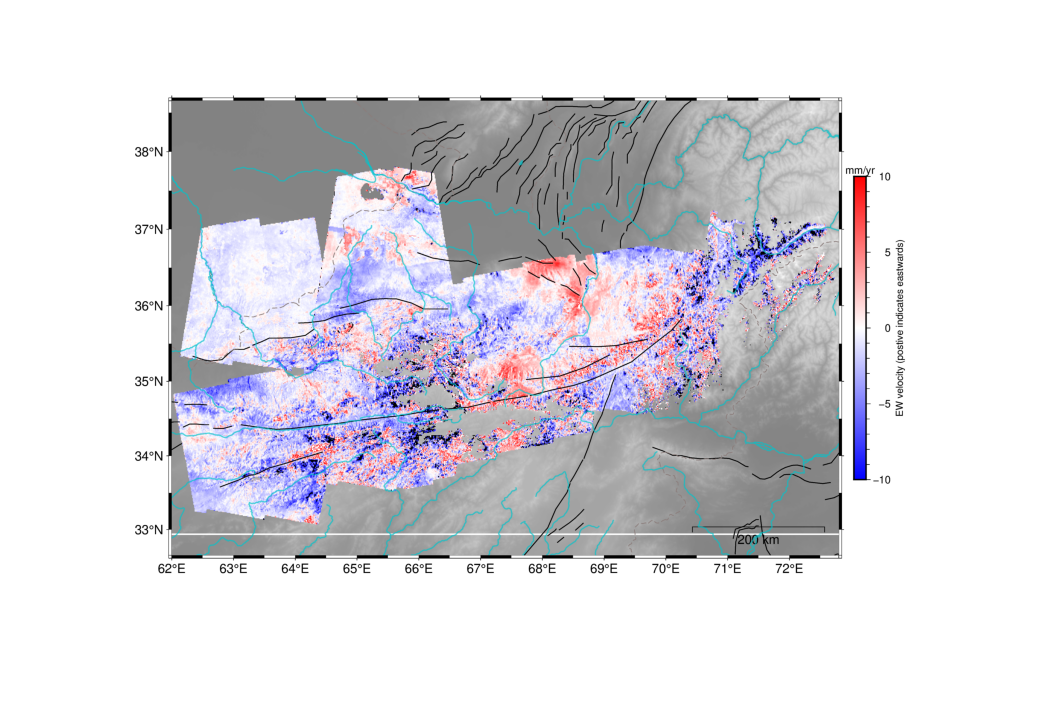

In [3]:
from IntPyGMT.IntPyGMT_overlay import gmt_png
%matplotlib widget

region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]
projection="M%s/%s/%s%s" % (centerlon, centerlat, proj_scale_w, proj_scale_unit)

gmt_png("frame_merge_map_EW.png", region, projection, "1.1c", "2.5c")